In [11]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [12]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA
pca = PCA(2)
mat_reduced = pca.fit_transform(x)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

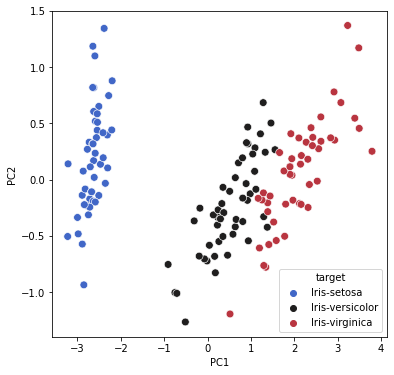

In [13]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1', y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire');

# This is Not a homework

In [46]:
import numpy as np

class ImpPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        # TODO
        X_meaned = X - np.mean(X, axis=0)

        cov_mat = np.cov(X_meaned, rowvar=False)

        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]

        self.eigenvector_subset = sorted_eigenvectors[:,0:self.n_components]
        
        
    def transform(self, X):
        # TODO
        X_meaned = X - np.mean(X, axis=0)
        return np.dot(self.eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

In [47]:
pca = ImpPCA(n_components=2)
pca.fit(x)
df = pca.transform(x)

principal_df = pd.DataFrame(df , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

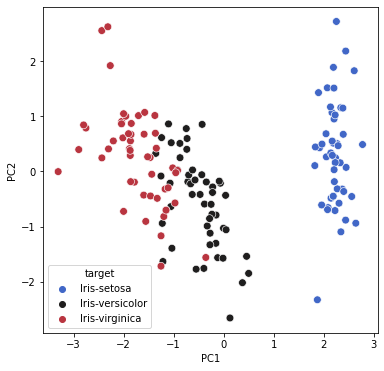

In [48]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1', y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire');

# This is homework

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target
X.shape

(70000, 784)

### For different number of componentns apply PCA to X
### Check accuracy on test,  time needed for transforming data and fitting the model
### Create a table as shown below (number of components in the table are not mandatory to use)
### You can apply some scalings to the dataset if you find it neccessary

![title](table.png)

In [ ]:
import time
import random
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# TODO

In [ ]:
df = df.sort_values(by='n_components')
df